In [1]:
!pipenv install seaborn

Installing seaborn...
Adding seaborn to Pipfile's [packages]...
✔ Installation Succeeded 
Installing dependencies from Pipfile.lock (a86837)...
  🐍   ▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉ 0/0 — 00:00:00


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data=pd.read_csv('../input/train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

얼마나 많이 죽었을까?

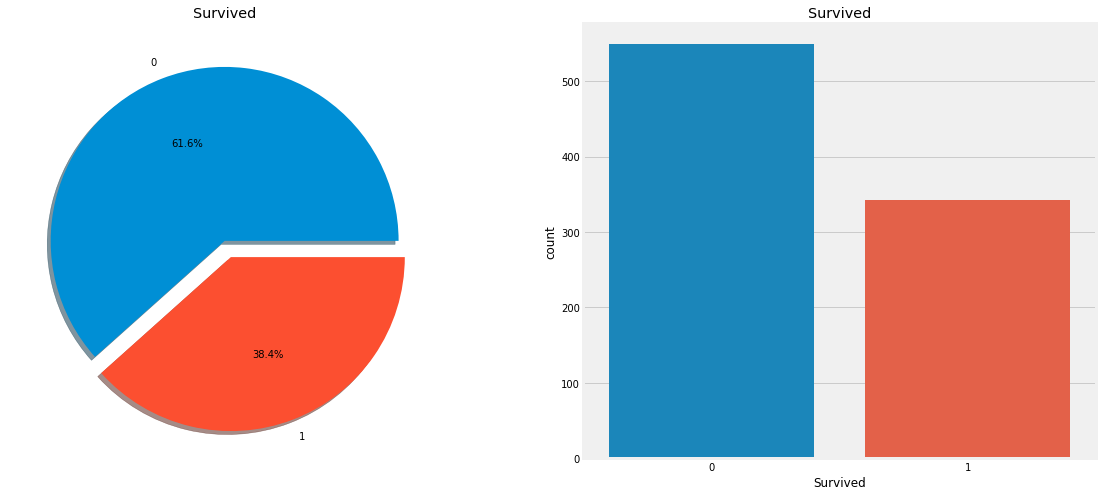

In [6]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

살아남은 사람보다 그렇지 않은 사람의 수가 더 많다. (training set의 생존률은 38.4%)

# Types of features

Categorical : Sex, Embarked     
orinal features: PClass     
continuous features: Age

# Analysing the features

## Sex -> Categorical feature

In [7]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

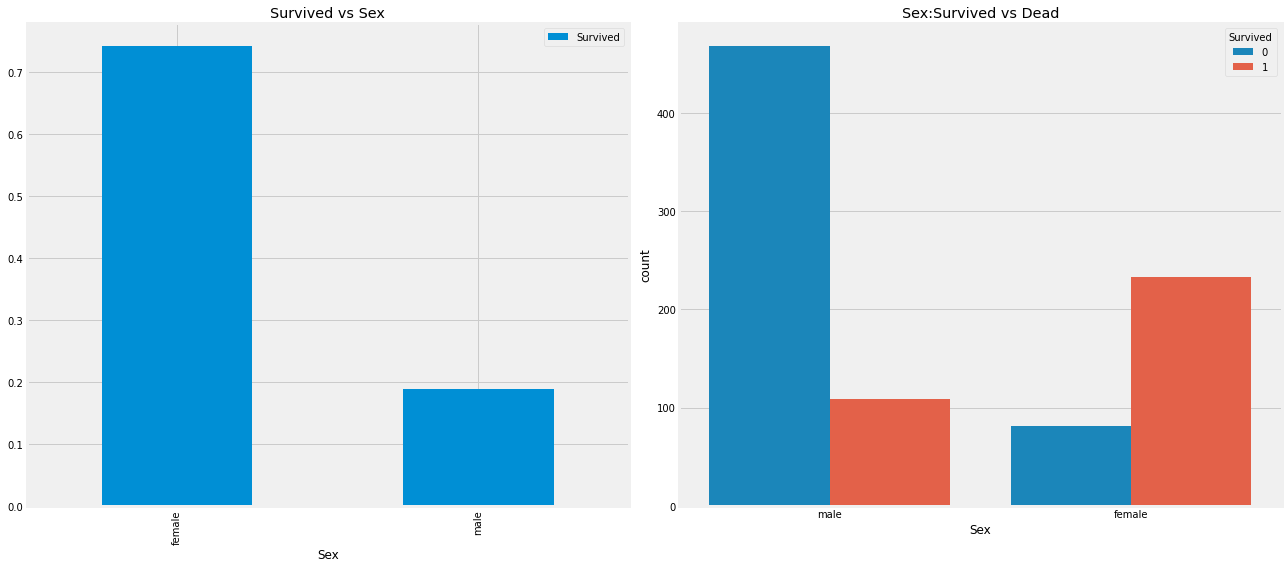

In [8]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.tight_layout()
plt.show()

여성의 생존율이 75%로 매우 높은 것을 보아 성별은 매우 중요한 특성임을 알 수 있다.

## Pclass -> Ordinal feature

In [9]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


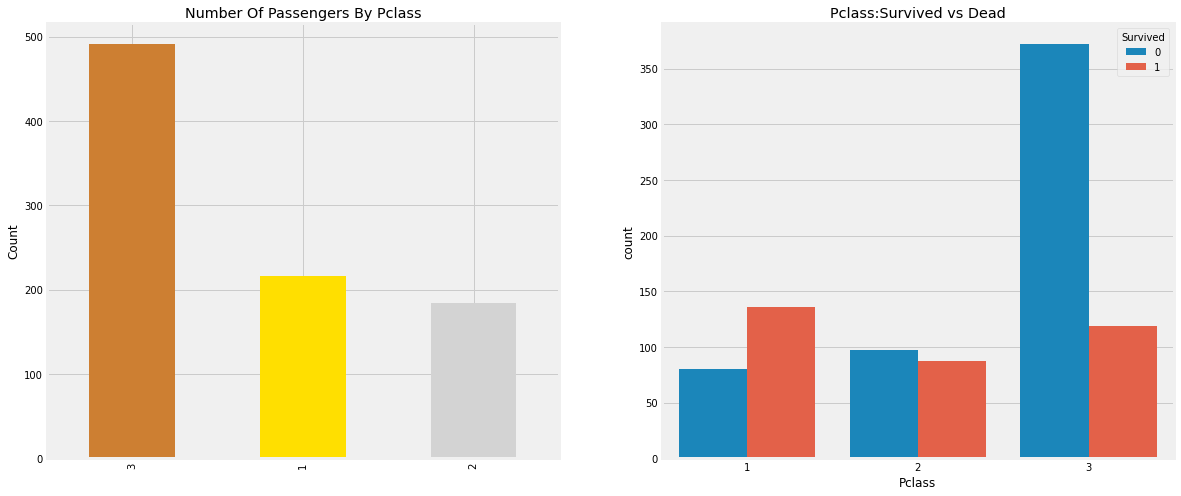

In [10]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

상대적으로 가난한 PClass3의 승객들의 사망율이 높은 것을 통해 돈이 생존율과 상관관계가 있는 것을 알 수 있다.

In [11]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

<Figure size 576x576 with 0 Axes>

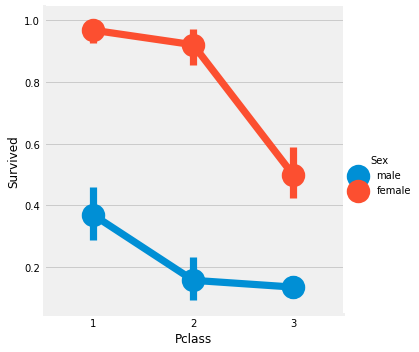

In [12]:
f = plt.figure(figsize=(8, 8))
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

Pclass와 관계없이 여성이 우선적으로 구조된 것을 확인할 수 있다.     
Pclass 에 따라 생존율이 변하는 것으로 Pclass 또한 중요한 특징임을 알 수 있다.

## Age -> Continuous feature

In [13]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


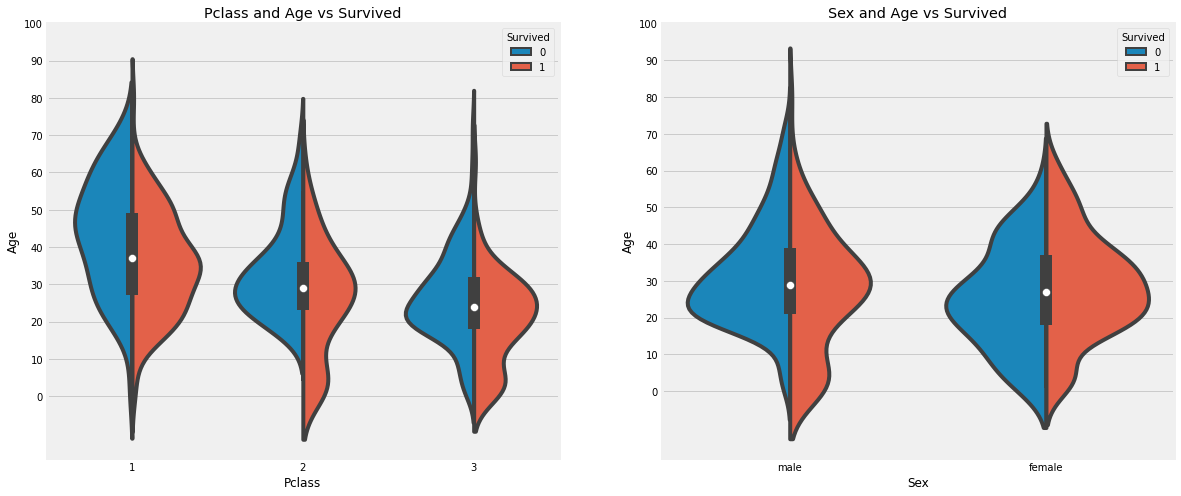

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

1. 10살 미만의 아이의 생존율이 높은 것을 확인할 수 있다.     
2. Pclass1에서 20~50세 까지의 생존율이 높은것을 확인할 수 있다.
3. 남성의 경우 나이가 들수록 생존율이 낮아지는 것을 확인할 수 있다.

# Null 값 채우기

## 나이

나이의 null 값을 채운다.     
mean 값을 사용할 수도 있지만 사람들의 나이분포가 다양하기 떄문에 하나의 값으로 채우는 것은 적절치 못하다.     
이름을 이용해서 그룹화 한 후 각 그룹의 평균 값으로 나이를 채운다.

In [15]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [16]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [17]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [18]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [19]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [20]:
data.Age.isnull().any() #So no null values left finally 

False

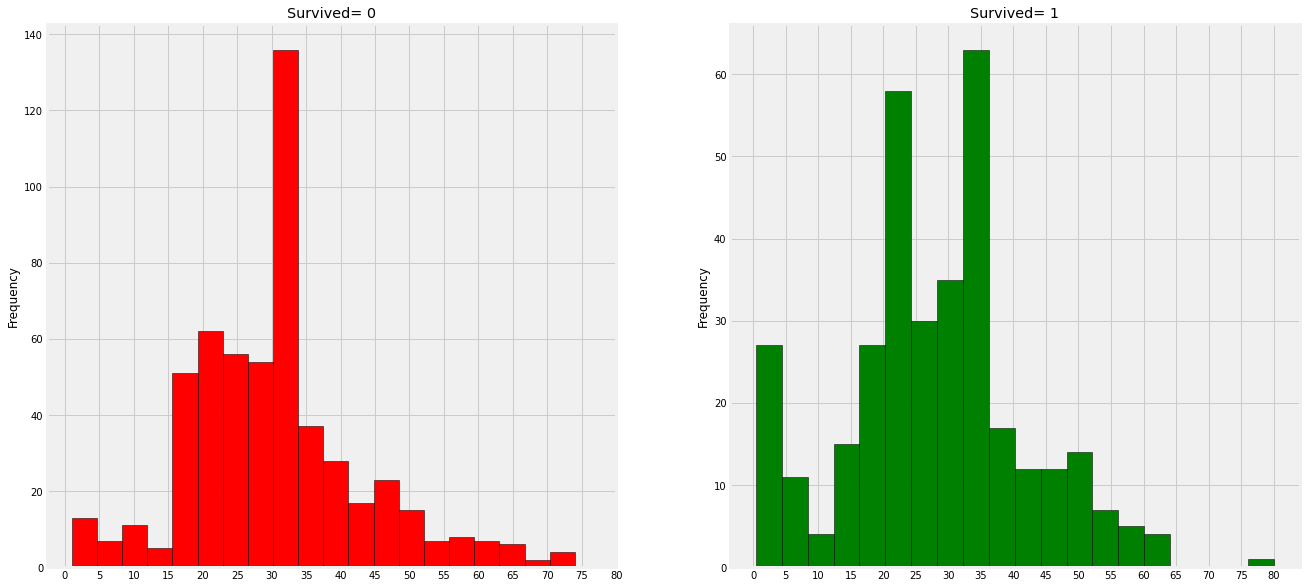

In [21]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

**Observation**
1. 5세 미만의 아이가 많이 살아남았다.
2. 가장 나이가 많은 승객 또한 살아남았다.
3. 가장 사망자 수가 많은 구간은 30~40세이다.

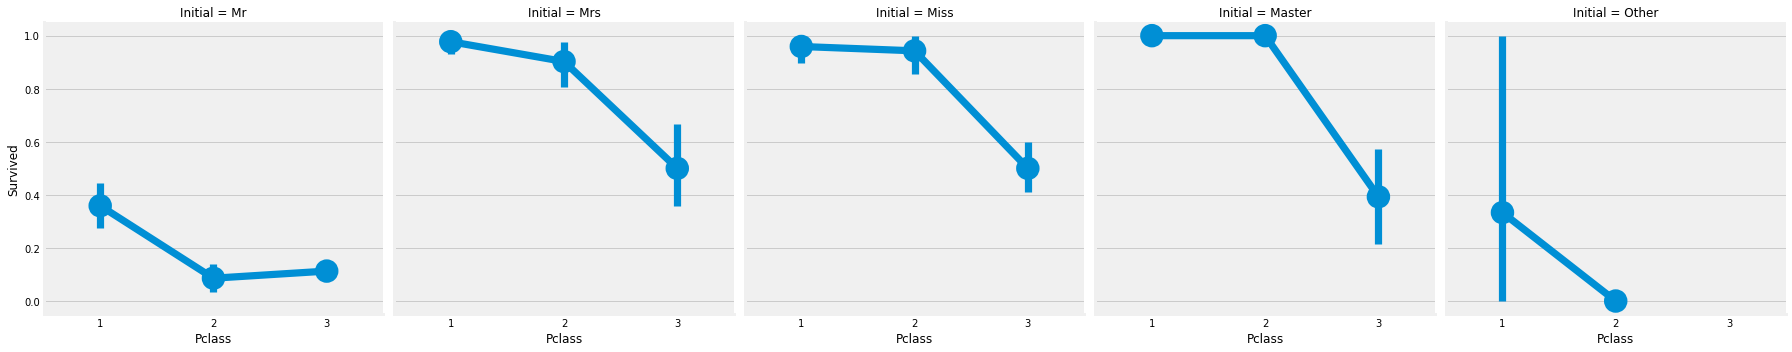

In [22]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

여성과 아이가 많이 살아남은 것을 확인할 수 있다.

## Embarked--> Categorical Value

In [23]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

Chances for Survival by Port Of Embarkation

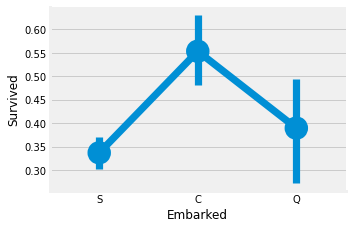

In [24]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

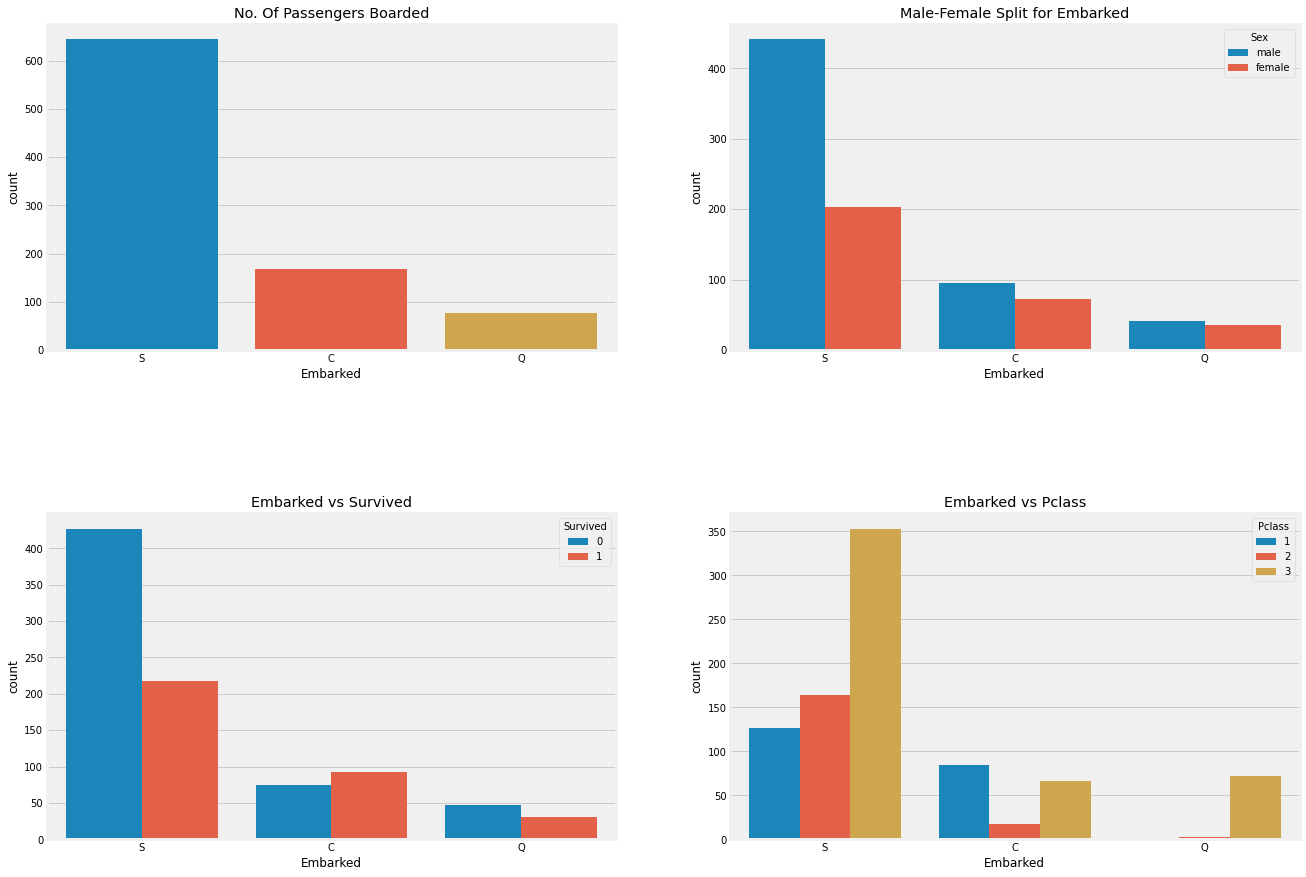

In [25]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

**Observation**
1. embarked == S 의 승객이 가장 많으며 그 중 대다수가 PClass==3 이다.
2. embarked == C 의 승객의 생존율이 다른 그룹보다 높은 것을 확인할 수 있다. 이는 embarked==C의 승객의 대부분이 PClass 1과 2로 이루어져 있기 때문으로 보인다.
3. embarked == S 에 돈이 많은 승객(PClass==1)이 많이 타고 있음에도 생존율이 낮은 것은 PClass==3의 승객이 다수이기 때문이다.
4. embarked == Q의 대부분의 승객은 PClass==3이다.

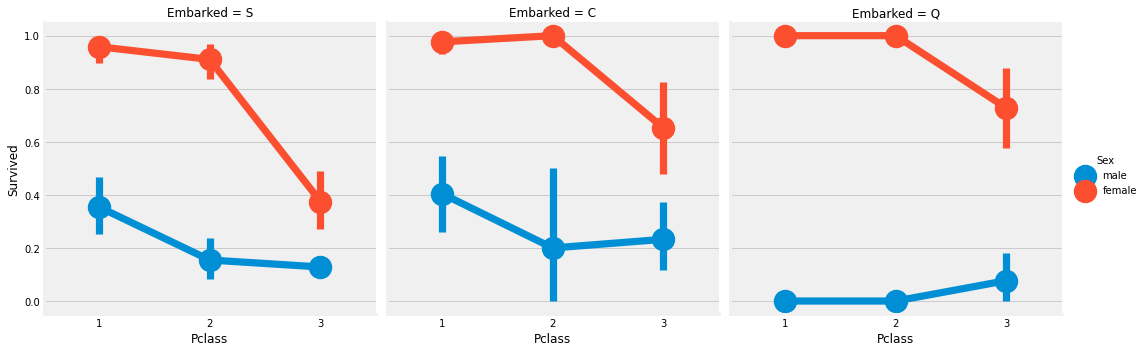

In [26]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

**Observation**
1. Pclass 1과 Pclass2에 대해 여성의 생존율은 Embarck와 관계없이 1에 가깝다.
2. Embarked == Q의 경우 남성의 생존율이 다른 Embarked에 비해 낮다.
3. embarked S에서 PClass == 3의 생존률이 현저히 낮은 것을 통해 재력이 생존율과 상관관계가 있는 것을 알 수 있다.

### Embarked 특징의 Null값 채우기

대부분의 승객들이 Embarked == S 이므로 Null 값을 S로 채운다.

In [27]:
data['Embarked'].fillna('S',inplace=True)

In [28]:
data.Embarked.isnull().any()# Finally No NaN values

False

## SibSip -> Discrete Feature

In [29]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


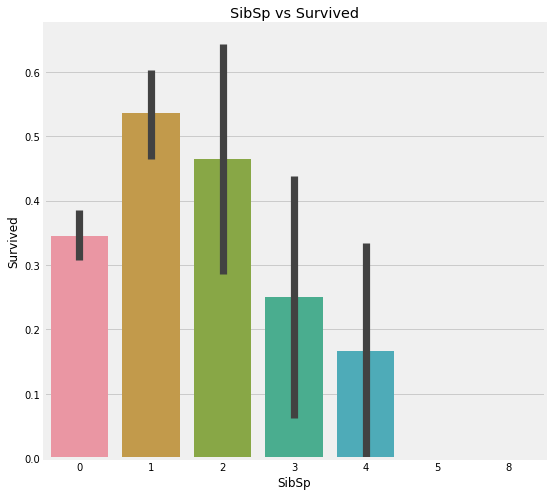

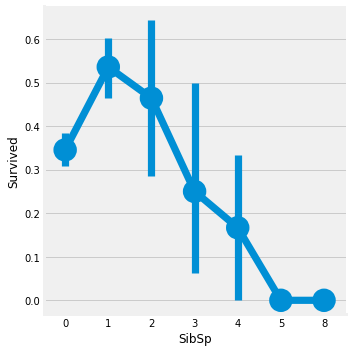

In [30]:
f, ax=plt.subplots(1,1,figsize=(8,8))
sns.barplot('SibSp','Survived', data=data, ax=ax)
ax.set_title('SibSp vs Survived')
g = sns.factorplot('SibSp','Survived', data=data)
g.set_titles('SibSp vs Survived')
#plt.close(2)
plt.show()

In [31]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


**Observation**
1. 혼자 탑승한 경우를 제외하면 함께 탑승한 형제자매등이 많을수록 생존율이 떨어진다. => 본인보다 우선시하기 때문일 수 있다.
2. Sibsp 수가 5~8의 생존율이 0인 것을 확인할 수 있다. 이들이 속한 PClass가 모두 3인 것을 보아 Sibsp보다 PClass와의 관계 때문으로 보인다.

# Parch

In [32]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


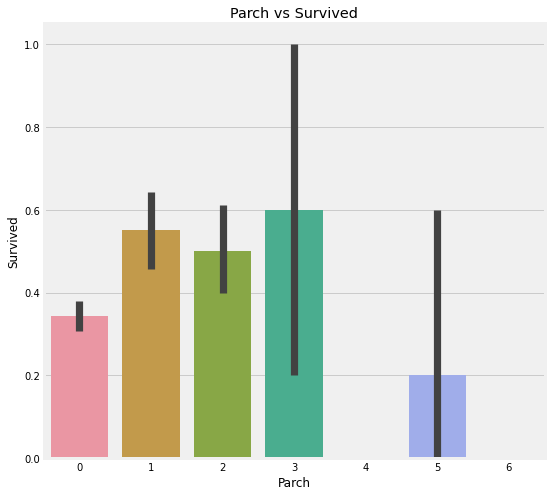

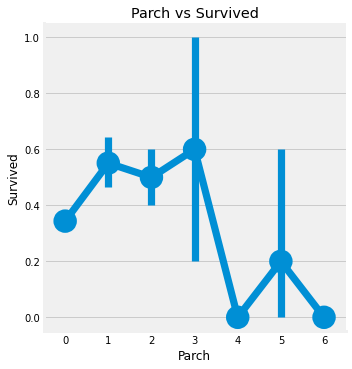

In [33]:
f,ax=plt.subplots(1,1,figsize=(8,8))
sns.barplot('Parch','Survived',data=data,ax=ax)
ax.set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=data).set(title='Parch vs Survived')
#plt.close(2)
plt.show()

**Observation**
1. 부모님과 함께 탑승한 승객의 경우 생존율이 높은 것으로 보인다.
   1. 1~3 명의 가족들과 같이 탑승한 경우 생존율이 높아지고 그보다 수가 많을 경우 생존율이 감소하는 것으로 보인다.

# Fare -> continous feature

In [34]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


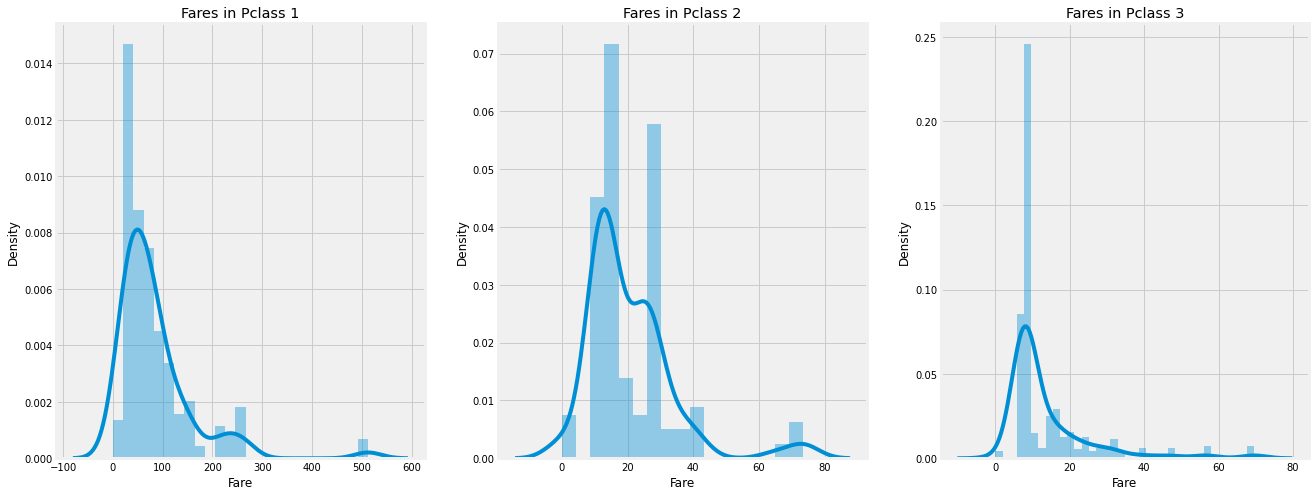

In [35]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

Pclass 1에서는 large distribution, 3으로 갈수록 분산이 작아지는 것으로 보인다. 추후에 모델에 사용할 때는 bin을 사용하여 discrete한 특징으로 변환해볼 수 있다.

# 특징 요약

**Sex**: 여성이 남성보다 생존율이 높은 것으로 보인다.    
**PClass**: PClass가 1에 가까울수록 생존율이 높다. => 돈이 생존확률과 상관관계가 있어보인다.    
**Age**: 5~10 살 사이의 승객의 생존율이 높고, 15~25세 사이의 승객의 생존율이 낮아보인다.    
**Embarked**: S에 대부분의 PClass1 승객이 타고 있음에도 C에 타는 것의 생존확률이 높아 보인다.    
**Parch+SibSp**: 1~2명의 자녀, 배우자와 1~3명의 parents로 이루어진 그룹의 생존율이 상대적으로 높다.

## Correlation Between The Features

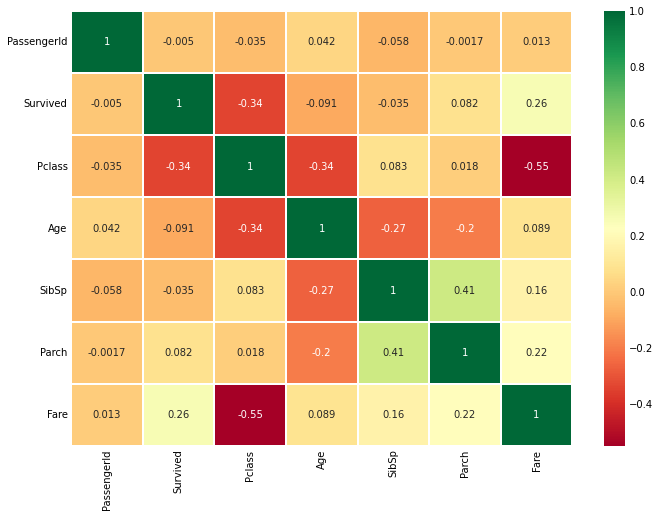

In [36]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

인자들이 서로 높은 상관관계를 갖는다면 인자의 수를 줄일 수 있다. 

# Feature engineering

## Age band

continuous한 Age 특징을 Oridinal로 바꾼다.

In [37]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [38]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band

,Age_band
1,382
2,325
0,104
3,69
4,11


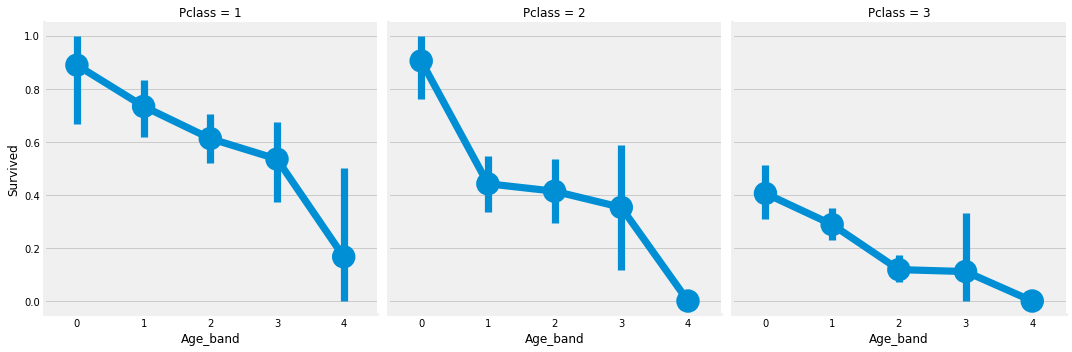

In [39]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

PClass와 관련없이 Age가 올라갈수록 생존률이 낮아지는 것을 확인할 수 있다.

## Family_size and Alone

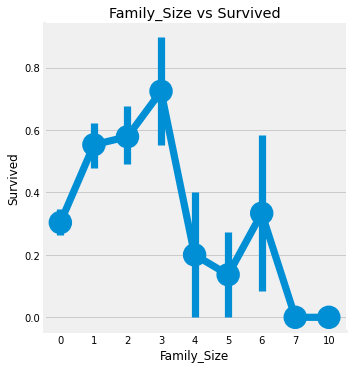

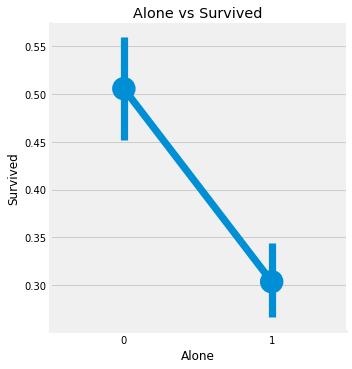

In [40]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

sns.factorplot('Family_Size','Survived',data=data).set(title='Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data).set(title='Alone vs Survived')
plt.show()

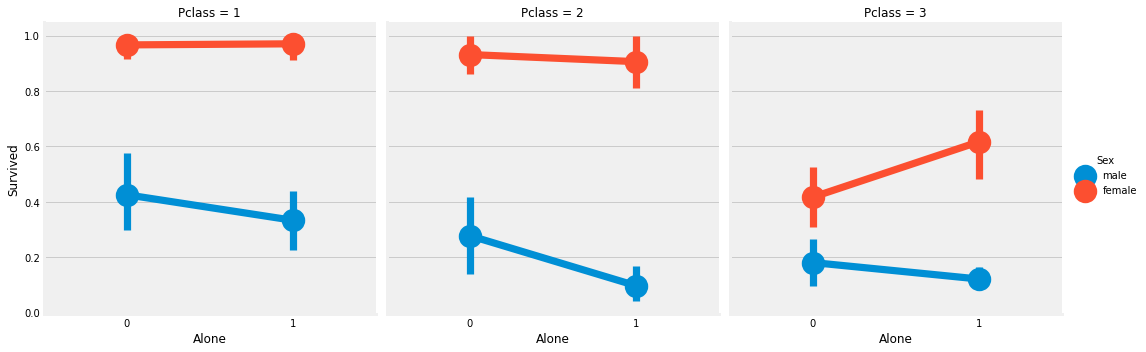

In [41]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

## Fare range

In [42]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [43]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

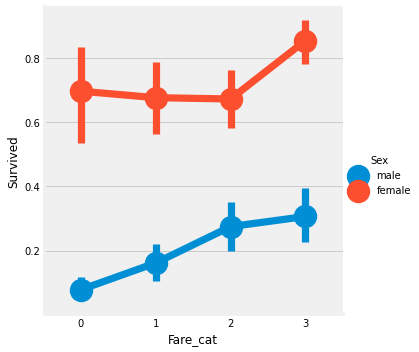

In [44]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

## Converting string value into numeric

In [45]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
# data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
# data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)
data = pd.get_dummies(data, columns=['Embarked'], prefix='Embarked')
data = pd.get_dummies(data, columns=['Initial'], prefix='Initial')

In [48]:
data.head(2)

,Survived,Pclass,Sex,SibSp,Parch,Age_band,Family_Size,Alone,Fare_cat,Embarked_C,Embarked_Q,Embarked_S,Initial_Master,Initial_Miss,Initial_Mr,Initial_Mrs,Initial_Other
0,0,3,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0
1,1,1,1,1,0,2,1,0,3,1,0,0,0,0,0,1,0


Dropping UnNeeded Features¶
Name--> We don't need name feature as it cannot be converted into any categorical value.

Age--> We have the Age_band feature, so no need of this.

Ticket--> It is any random string that cannot be categorised.

Fare--> We have the Fare_cat feature, so unneeded

Cabin--> A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.

Fare_Range--> We have the fare_cat feature.

PassengerId--> Cannot be categorised.

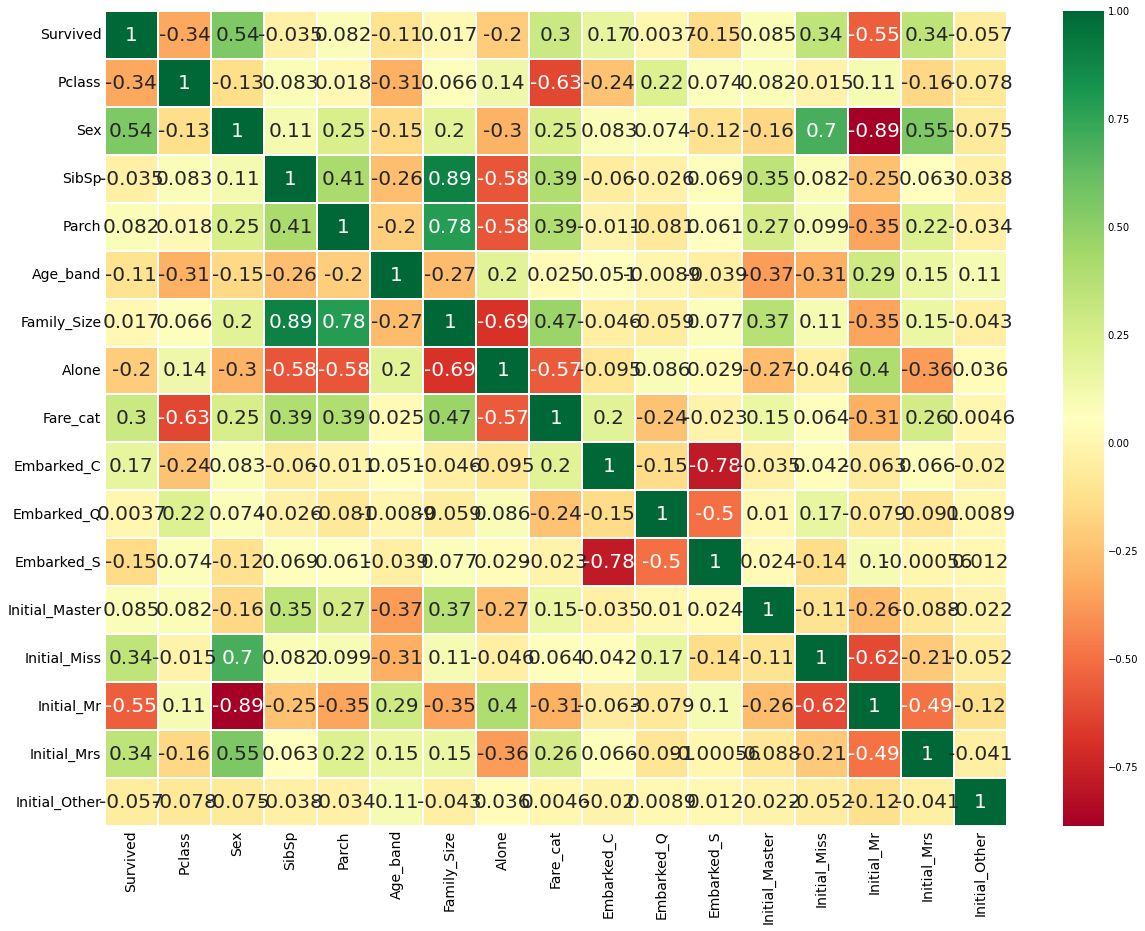

In [46]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [49]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Age_band',
       'Family_Size', 'Alone', 'Fare_cat', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Initial_Master', 'Initial_Miss', 'Initial_Mr',
       'Initial_Mrs', 'Initial_Other'],
      dtype='object')

# Predicting

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')